In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import numpy as np
import pickle as pkl
import os
import seaborn as sns
import pandas as pd
import fnmatch
from scipy.stats import binom_test
from scipy.stats import binom,ranksums,wilcoxon

/home/chenani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


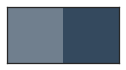

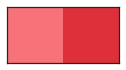

In [27]:
sns.set_context("poster",font_scale=1.7)
conti = sns.color_palette(["#707f8e","#34495e"])
lessi  = sns.color_palette(['#f8727a',"#dd303b"])
sns.palplot(conti)
sns.palplot(lessi)
sns.set_style('white')
kr = np.array(['k','r'])

SWR           Control vs. Lesion p=0.000037
SWR in DELTA, Control vs. Lesion p=0.000095
SWR in THETA, Control vs. Lesion p=0.000052
--------------------------
SWR in Control        PRE vs. POST p=0.001134
SWR in DELTA-Control, PRE vs. POST p=0.002888
SWR in THETA-Control, PRE vs. POST p=0.094818
--------------------------
SWR in Lesion        PRE vs. POST p=0.536479
SWR in DELTA-Lesion, PRE vs. POST p=0.555158
SWR in THETA-Lesion, PRE vs. POST p=0.415170


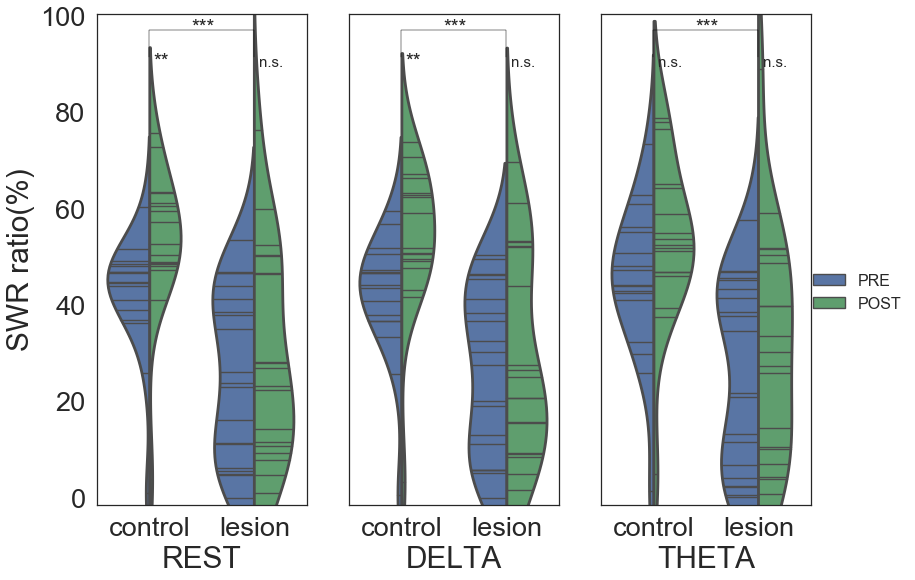

In [6]:
fgRipp_percentiles = pd.read_pickle('/mnt/Data/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')
sns.set_style('white')
f,(ax,bx,cx) = pl.subplots(1,3,sharey=True)
sns.violinplot(x='group',y='SWR_prcnt',data=fgRipp_percentiles,inner='stick',split=True,hue='session',order=['control','lesion'],ax=ax)
sns.violinplot(x='group',y='SWR_sws',data=fgRipp_percentiles,inner='stick',split=True,hue='session',order=['control','lesion'],ax=bx)
sns.violinplot(x='group',y='SWR_rem',data=fgRipp_percentiles,inner='stick',split=True,hue='session',order=['control','lesion'],ax=cx)
#sns.swarmplot(x='group',y='SWR_prcnt',hue='session',size = 2,data=fgRipp_percentiles,ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.text(0.04, 90, r'**', fontsize=20)
ax.text(1.04, 90, r'n.s.', fontsize=15)
ax.text(0.4, 97, r'***', fontsize=20)
bx.text(0.4, 97, r'***', fontsize=20)
cx.text(0.4, 97, r'***', fontsize=20)
ax.annotate('', xy=(0, 91.), xycoords='data',xytext=(1., 91),arrowprops=dict(arrowstyle="-",connectionstyle="bar",ec="k",shrinkA=5, shrinkB=5))
bx.annotate('', xy=(0, 91.), xycoords='data',xytext=(1., 91),arrowprops=dict(arrowstyle="-",connectionstyle="bar",ec="k",shrinkA=5, shrinkB=5))
cx.annotate('', xy=(0, 91.), xycoords='data',xytext=(1., 91),arrowprops=dict(arrowstyle="-",connectionstyle="bar",ec="k",shrinkA=5, shrinkB=5))
bx.text(0.04, 90, r'**', fontsize=20)
bx.text(1.04, 90, r'n.s.', fontsize=15)
cx.text(0.04, 90, r'n.s.', fontsize=15)
cx.text(1.04, 90, r'n.s.', fontsize=15)
ax.legend('',fontsize=10)
bx.legend('',fontsize=10)
cx.legend(fontsize=16,bbox_to_anchor=(1.5, 0.5))
ax.set_xlabel('REST')
bx.set_xlabel('DELTA')
cx.set_xlabel('THETA')
ax.set_ylabel('SWR ratio(%)')
bx.set_ylabel('')
cx.set_ylabel('')
ax.set_ylim(-1,101)
dfCont = fgRipp_percentiles[fgRipp_percentiles.group=='control']
dfLes  = fgRipp_percentiles[fgRipp_percentiles.group=='lesion'] 
print 'SWR           Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_prcnt,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_prcnt)[1]
print 'SWR in DELTA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_sws,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_sws)[1]
print 'SWR in THETA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_rem,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_rem)[1]
print '--------------------------'
print 'SWR in Control        PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_prcnt,dfCont[dfCont.session=='POST'].SWR_prcnt)[1]
print 'SWR in DELTA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_sws,dfCont[dfCont.session=='POST'].SWR_sws)[1]
print 'SWR in THETA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_rem,dfCont[dfCont.session=='POST'].SWR_rem)[1]
print '--------------------------'
print 'SWR in Lesion        PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_prcnt,dfLes[dfLes.session=='POST'].SWR_prcnt)[1]
print 'SWR in DELTA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_sws,  dfLes[dfLes.session=='POST'].SWR_sws)[1]

print 'SWR in THETA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_rem,  dfLes[dfLes.session=='POST'].SWR_rem)[1]
f.savefig('/mnt/Data/ownCloud/Plots/Lesion-Project/SWR-FG-percentile-plot.pdf')

SWR           Control vs. Lesion p=0.000037
SWR in DELTA, Control vs. Lesion p=0.000095
SWR in THETA, Control vs. Lesion p=0.000052
--------------------------
SWR in Control        PRE vs. POST p=0.001134
SWR in DELTA-Control, PRE vs. POST p=0.002888
SWR in THETA-Control, PRE vs. POST p=0.094818
--------------------------
SWR in Lesion        PRE vs. POST p=0.536479
SWR in DELTA-Lesion, PRE vs. POST p=0.555158
SWR in THETA-Lesion, PRE vs. POST p=0.415170


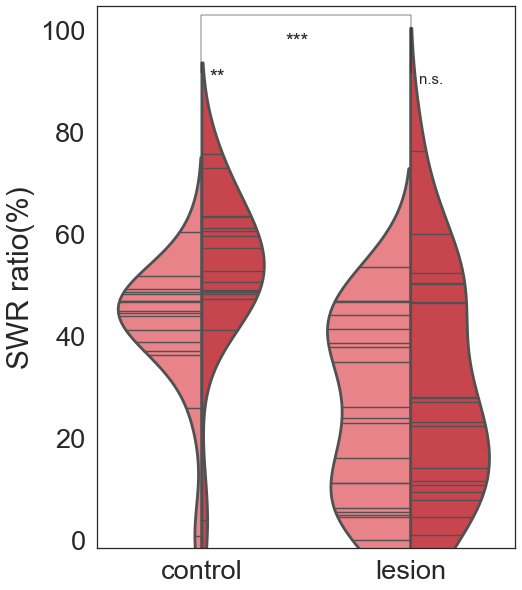

In [30]:
fgRipp_percentiles = pd.read_pickle('/mnt/Data/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')
sns.set_style('white')
f,(ax) = pl.subplots(1,1,figsize=[7.5,9.7])
sns.violinplot(x='group',y='SWR_prcnt',data=fgRipp_percentiles,inner='stick',split=True,hue='session',palette=lessi,order=['control','lesion'],ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.text(0.04, 90, r'**', fontsize=20)
ax.text(1.04, 90, r'n.s.', fontsize=15)
ax.text(0.4, 97, r'***', fontsize=20)
ax.annotate('', xy=(0, 91.), xycoords='data',xytext=(1., 91),arrowprops=dict(arrowstyle="-",connectionstyle="bar",ec="k",shrinkA=5, shrinkB=5))
ax.legend('',fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('SWR ratio(%)')
ax.set_ylim(-1,105)
dfCont = fgRipp_percentiles[fgRipp_percentiles.group=='control']
dfLes  = fgRipp_percentiles[fgRipp_percentiles.group=='lesion'] 
print 'SWR           Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_prcnt,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_prcnt)[1]
print 'SWR in DELTA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_sws,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_sws)[1]
print 'SWR in THETA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_rem,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_rem)[1]
print '--------------------------'
print 'SWR in Control        PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_prcnt,dfCont[dfCont.session=='POST'].SWR_prcnt)[1]
print 'SWR in DELTA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_sws,dfCont[dfCont.session=='POST'].SWR_sws)[1]
print 'SWR in THETA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_rem,dfCont[dfCont.session=='POST'].SWR_rem)[1]
print '--------------------------'
print 'SWR in Lesion        PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_prcnt,dfLes[dfLes.session=='POST'].SWR_prcnt)[1]
print 'SWR in DELTA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_sws,  dfLes[dfLes.session=='POST'].SWR_sws)[1]
print 'SWR in THETA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_rem,  dfLes[dfLes.session=='POST'].SWR_rem)[1]
f.savefig('/mnt/Data/ownCloud/Plots/Lesion-Project/SWR-FG-percentile-plot.pdf')

FG           Control vs. Lesion p=0.000028
FG in DELTA, Control vs. Lesion p=0.000072
FG in THETA, Control vs. Lesion p=0.000047
--------------------------
FG in Control        PRE vs. POST p=0.001134
FG in DELTA-Control, PRE vs. POST p=0.002888
FG in THETA-Control, PRE vs. POST p=0.094818
--------------------------
FG in Lesion        PRE vs. POST p=0.632893
FG in DELTA-Lesion, PRE vs. POST p=0.653027
FG in THETA-Lesion, PRE vs. POST p=0.500094


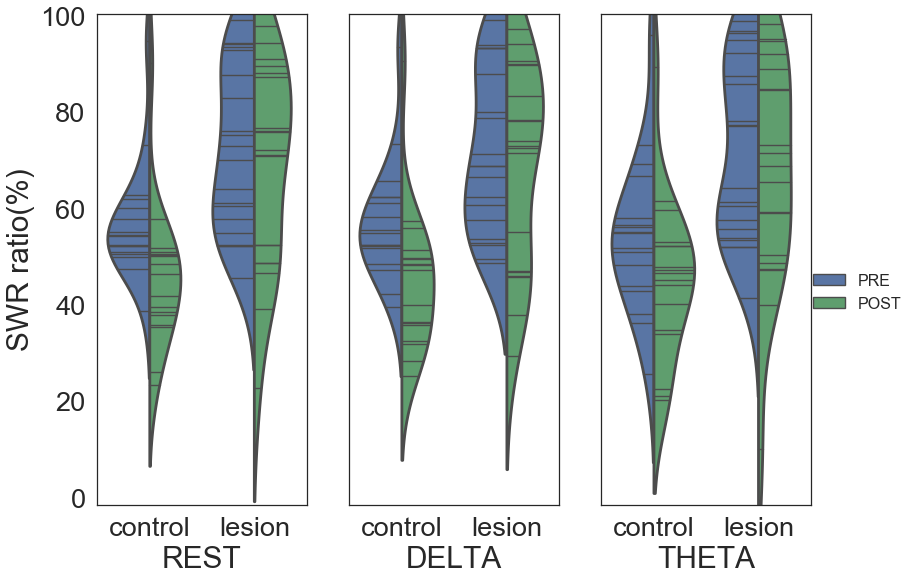

In [8]:
fgRipp_percentiles = pd.read_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')
sns.set_style('white')
f,(ax,bx,cx) = pl.subplots(1,3,sharey=True)
sns.violinplot(x='group',y='FG_prcnt',data=fgRipp_percentiles,inner='stick',split=True,hue='session',order=['control','lesion'],ax=ax)
sns.violinplot(x='group',y='FG_sws',data=fgRipp_percentiles,inner='stick',split=True,hue='session',order=['control','lesion'],ax=bx)
sns.violinplot(x='group',y='FG_rem',data=fgRipp_percentiles,inner='stick',split=True,hue='session',order=['control','lesion'],ax=cx)
#sns.swarmplot(x='group',y='SWR_prcnt',hue='session',size = 2,data=fgRipp_percentiles,ax=ax)
ax.legend('',fontsize=10)
bx.legend('',fontsize=10)
cx.legend(fontsize=16,bbox_to_anchor=(1.5, 0.5))
ax.set_xlabel('REST')
bx.set_xlabel('DELTA')
cx.set_xlabel('THETA')
ax.set_ylabel('SWR ratio(%)')
bx.set_ylabel('')
cx.set_ylabel('')
ax.set_ylim(-1,101)
dfCont = fgRipp_percentiles[fgRipp_percentiles.group=='control']
dfLes  = fgRipp_percentiles[fgRipp_percentiles.group=='lesion'] 
print 'FG           Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].FG_prcnt,
                                                       fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].FG_prcnt)[1]
print 'FG in DELTA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].FG_sws,
                                                       fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].FG_sws)[1]
print 'FG in THETA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].FG_rem,
                                                       fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].FG_rem)[1]
print '--------------------------'
print 'FG in Control        PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].FG_prcnt,dfCont[dfCont.session=='POST'].FG_prcnt)[1]
print 'FG in DELTA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].FG_sws,dfCont[dfCont.session=='POST'].FG_sws)[1]
print 'FG in THETA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].FG_rem,dfCont[dfCont.session=='POST'].FG_rem)[1]
print '--------------------------'
print 'FG in Lesion        PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].FG_prcnt,dfLes[dfLes.session=='POST'].FG_prcnt)[1]
print 'FG in DELTA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].FG_sws,  dfLes[dfLes.session=='POST'].FG_sws)[1]
print 'FG in THETA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].FG_rem,  dfLes[dfLes.session=='POST'].FG_rem)[1]
f.savefig('/home/chenani/ownCloud/Plots/Lesion-Project/SWR-FG-percentile-plot.pdf')

In [4]:
RUNdf  = pd.read_excel('./files/RO-PR-dataframe-RankOrder.xls')[:28]
PREdf  = pd.read_excel('./files/RO-PR-dataframe-RankOrder.xls',sheetname='PRE')[:28]
POSTdf = pd.read_excel('./files/RO-PR-dataframe-RankOrder.xls',sheetname='POST')[:28]
for idx ,row in RUNdf.iterrows():
    if binom_test(row.N_sig_RO,row.N_all_RO,5e-2)<5e-2:
        RUNdf.pv_RO[idx] = 1
    else:
        RUNdf.pv_RO[idx] = 0
sig = np.int0(np.int16([binom_test(row.Ns,row.Nt)for idx,row in PREdf.iterrows()])<5e-2)
sigD = np.int0(np.int16([binom_test(row.NsDelta,row.NtDelta)for idx,row in PREdf.iterrows()])<5e-2)
sigT = np.int0(np.int16([binom_test(row.NsTheta,row.NtTheta)for idx,row in PREdf.iterrows()])<5e-2)
PREdf['sig'] = pd.Series(sig,index=PREdf.index)
PREdf['sigD'] = pd.Series(sigD,index=PREdf.index)
PREdf['sigT'] = pd.Series(sigT,index=PREdf.index)
sig = np.int0(np.int16([binom_test(row.Ns,row.Nt)for idx,row in POSTdf.iterrows()])<5e-2)
sigD = np.int0(np.int16([binom_test(row.NsDelta,row.NtDelta)for idx,row in POSTdf.iterrows()])<5e-2)
sigT = np.int0(np.int16([binom_test(row.NsTheta,row.NtTheta)for idx,row in POSTdf.iterrows()])<5e-2)
POSTdf['sig'] = pd.Series(sig,index=POSTdf.index)
POSTdf['sigD'] = pd.Series(sigD,index=POSTdf.index)
POSTdf['sigT'] = pd.Series(sigT,index=POSTdf.index)

/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


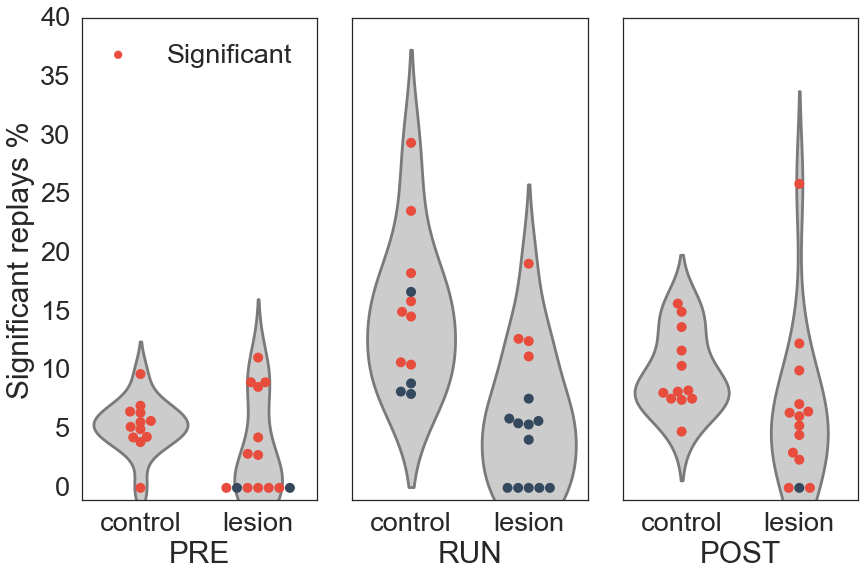

In [5]:
f,(ax,bx,cx) = pl.subplots(1,3,sharey=True);
###############################################
sns.violinplot(x='group',y='prct',data=PREdf,inner=None, color=".8",ax=ax)
sns.swarmplot(x='group',y='prct',hue='sig',size = 10,data=PREdf,ax=ax,palette=flatui)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:2],['Significant'])
ax.set_xlabel('PRE')
ax.set_ylabel('Significant replays %')
ax.set_ylim(-1,40)
##############################################

sns.violinplot(x='group',y='prcnt_RO',data=RUNdf,inner=None, color=".8",ax=bx)
ax = sns.swarmplot(x='group',y='prcnt_RO',hue='pv_RO',size = 10,data=RUNdf,ax=bx,palette=flatui)
#handles, labels = ax.get_legend_handles_labels()
bx.legend([],[])
bx.set_ylabel('')
bx.set_xlabel('RUN')

##############################################
sns.violinplot(x='group',y='prct',data=POSTdf,inner=None, color=".8",cx=ax)
sns.swarmplot(x='group',y='prct',hue='sig',size = 10,data=POSTdf,ax=cx,palette=flatui)
cx.legend([],[])
cx.set_ylabel('')
cx.set_xlabel('POST')
f.tight_layout()

In [20]:
binom.interval(0.05,1000,5e-2)

(49.0, 50.0)

In [6]:
RUNpr  = pd.read_excel('./files/RO-PR-dataframe-Persistance.xls')[:28]
PREpr  = pd.read_excel('./files/RO-PR-dataframe-Persistance.xls',sheetname='PRE')[:28]
POSTpr = pd.read_excel('./files/RO-PR-dataframe-Persistance.xls',sheetname='POST')[:28]
for idx ,row in RUNpr.iterrows():
    if binom_test(row.N_sig_RO,row.N_all_RO,5e-2)<5e-2:
        RUNpr.pv_RO[idx] = 1
    else:
        RUNpr.pv_RO[idx] = 0
sig = np.int0(np.int16([binom_test(row.Ns,row.Nt)for idx,row in PREpr.iterrows()])<5e-2)
sigD = np.int0(np.int16([binom_test(row.NsDelta,row.NtDelta)for idx,row in PREpr.iterrows()])<5e-2)
sigT = np.int0(np.int16([binom_test(row.NsTheta,row.NtTheta)for idx,row in PREpr.iterrows()])<5e-2)
PREpr['sig'] = pd.Series(sig,index=PREpr.index)
PREpr['sigD'] = pd.Series(sigD,index=PREpr.index)
PREpr['sigT'] = pd.Series(sigT,index=PREpr.index)
sig = np.int0(np.int16([binom_test(row.Ns,row.Nt)for idx,row in POSTpr.iterrows()])<5e-2)
sigD = np.int0(np.int16([binom_test(row.NsDelta,row.NtDelta)for idx,row in POSTpr.iterrows()])<5e-2)
sigT = np.int0(np.int16([binom_test(row.NsTheta,row.NtTheta)for idx,row in POSTpr.iterrows()])<5e-2)
POSTpr['sig'] = pd.Series(sig,index=POSTpr.index)
POSTpr['sigD'] = pd.Series(sigD,index=POSTpr.index)
POSTpr['sigT'] = pd.Series(sigT,index=POSTpr.index)

/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


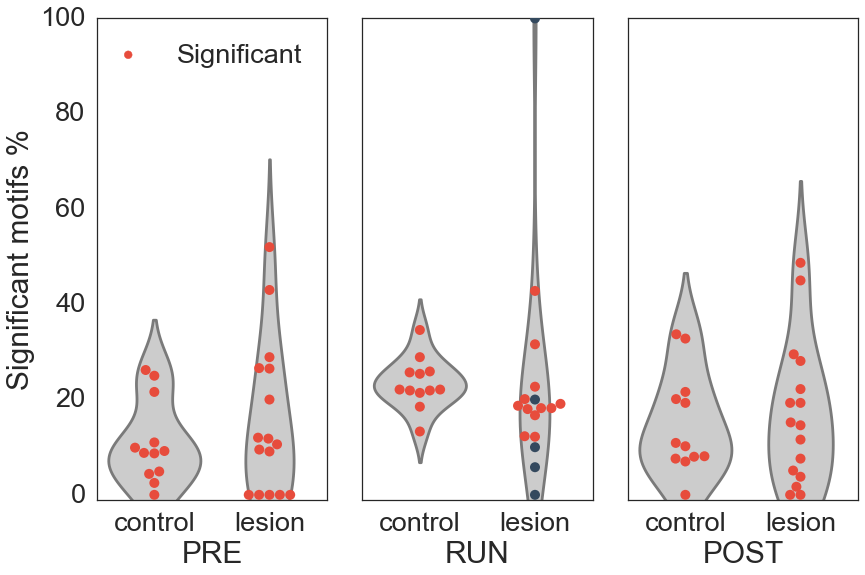

In [7]:
f,(ax,bx,cx) = pl.subplots(1,3,sharey=True);
###############################################
sns.violinplot(x='group',y='prct',data=PREpr,inner=None, color=".8",ax=ax)
sns.swarmplot(x='group',y='prct',hue='sig',size = 10,data=PREpr,ax=ax,palette=flatui)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:2],['Significant'])
ax.set_xlabel('PRE')
ax.set_ylabel('Significant motifs %')
ax.set_ylim(-1,100)
##############################################

sns.violinplot(x='group',y='prcnt_RO',data=RUNpr,inner=None, color=".8",ax=bx)
ax = sns.swarmplot(x='group',y='prcnt_RO',hue='pv_RO',size = 10,data=RUNpr,ax=bx,palette=flatui)
#handles, labels = ax.get_legend_handles_labels()
bx.legend([],[])
bx.set_ylabel('')
bx.set_xlabel('RUN')

##############################################
sns.violinplot(x='group',y='prct',data=POSTpr,inner=None, color=".8",cx=ax)
sns.swarmplot(x='group',y='prct',hue='sig',size = 10,data=POSTpr,ax=cx,palette=flatui)
cx.legend([],[])
cx.set_ylabel('')
cx.set_xlabel('POST')
f.tight_layout()

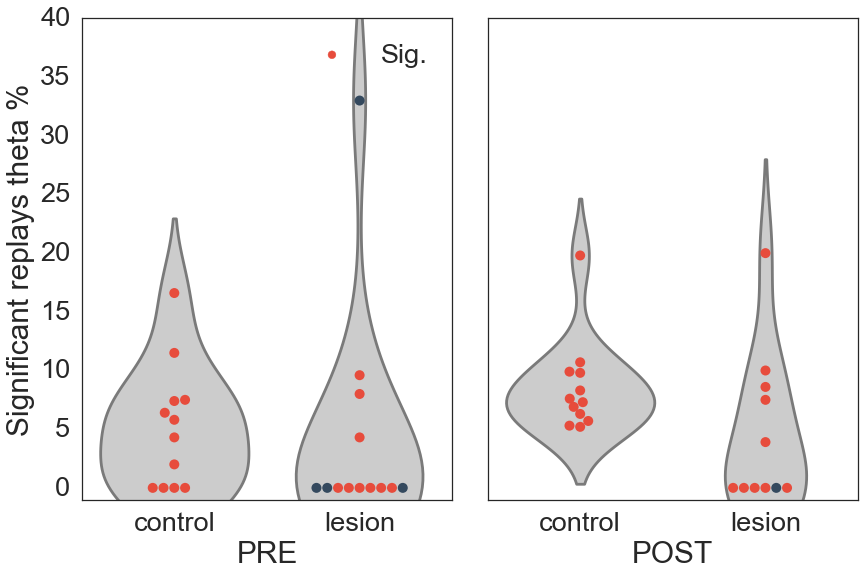

In [8]:
f,(ax,cx) = pl.subplots(1,2,sharey=True);
###############################################
sns.violinplot(x='group',y='prctTheta',data=PREdf,inner=None, color=".8",ax=ax)
sns.swarmplot(x='group',y='prctTheta',hue='sigT',size = 10,data=PREdf,ax=ax,palette=flatui)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:2],['Sig.'])
ax.set_xlabel('PRE')
ax.set_ylabel('Significant replays theta %')
ax.set_ylim(-1,40)
############################################
sns.violinplot(x='group',y='prctTheta',data=POSTdf,inner=None, color=".8",cx=ax)
sns.swarmplot(x='group',y='prctTheta',hue='sigT',size = 10,data=POSTdf,ax=cx,palette=flatui)
cx.legend([],[])
cx.set_ylabel('')
cx.set_xlabel('POST')
f.tight_layout()

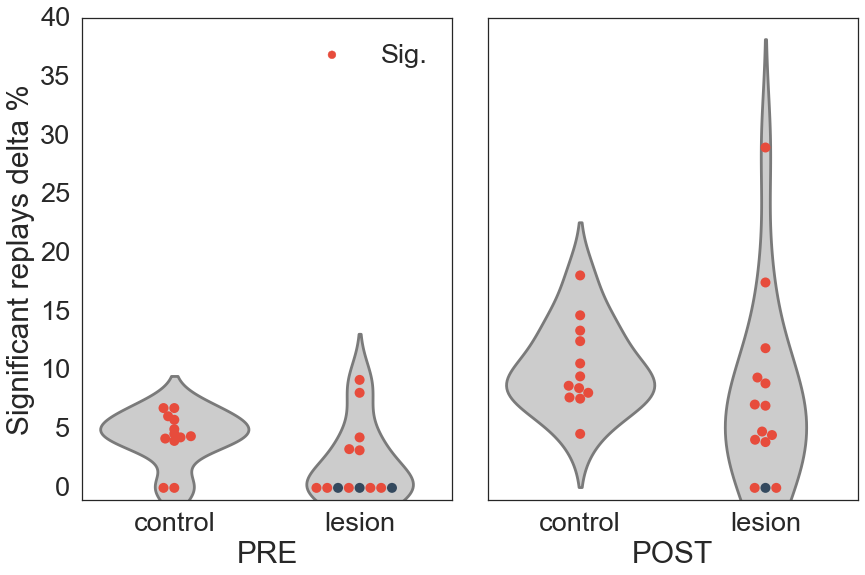

In [9]:
f,(ax,cx) = pl.subplots(1,2,sharey=True);
###############################################
sns.violinplot(x='group',y='prctDelta',data=PREdf,inner=None, color=".8",ax=ax)
sns.swarmplot(x='group',y='prctDelta',hue='sigD',size = 10,data=PREdf,ax=ax,palette=flatui)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:2],['Sig.'])
ax.set_xlabel('PRE')
ax.set_ylabel('Significant replays delta %')
ax.set_ylim(-1,40)
############################################
sns.violinplot(x='group',y='prctDelta',data=POSTdf,inner=None, color=".8",cx=ax)
sns.swarmplot(x='group',y='prctDelta',hue='sigD',size = 10,data=POSTdf,ax=cx,palette=flatui)
cx.legend([],[])
cx.set_ylabel('')
cx.set_xlabel('POST')
f.tight_layout()

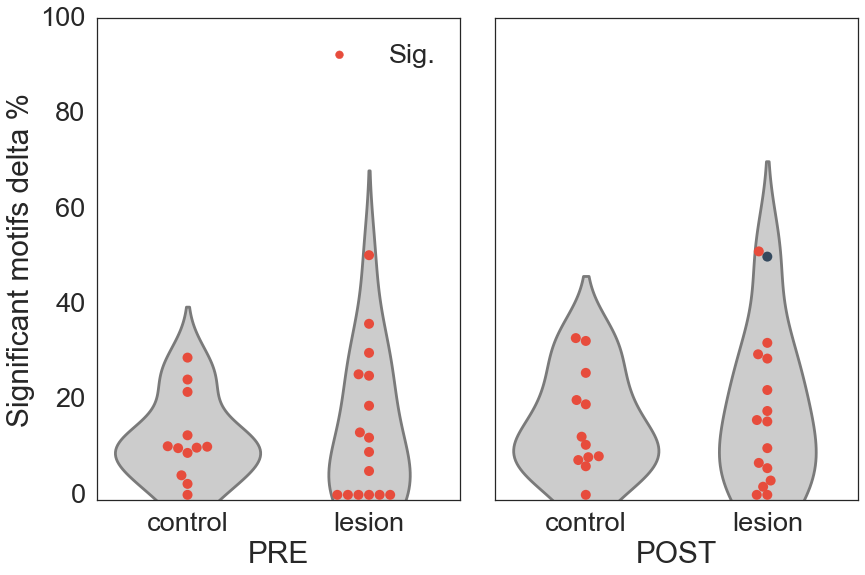

In [10]:
f,(ax,cx) = pl.subplots(1,2,sharey=True);
###############################################
sns.violinplot(x='group',y='prctDelta',data=PREpr,inner=None, color=".8",ax=ax)
sns.swarmplot(x='group',y='prctDelta',hue='sigD',size = 10,data=PREpr,ax=ax,palette=flatui)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:2],['Sig.'])
ax.set_xlabel('PRE')
ax.set_ylabel('Significant motifs delta %')
ax.set_ylim(-1,100)
############################################
sns.violinplot(x='group',y='prctDelta',data=POSTpr,inner=None, color=".8",cx=ax)
sns.swarmplot(x='group',y='prctDelta',hue='sigD',size = 10,data=POSTpr,ax=cx,palette=flatui)
cx.legend([],[])
cx.set_ylabel('')
cx.set_xlabel('POST')
f.tight_layout()

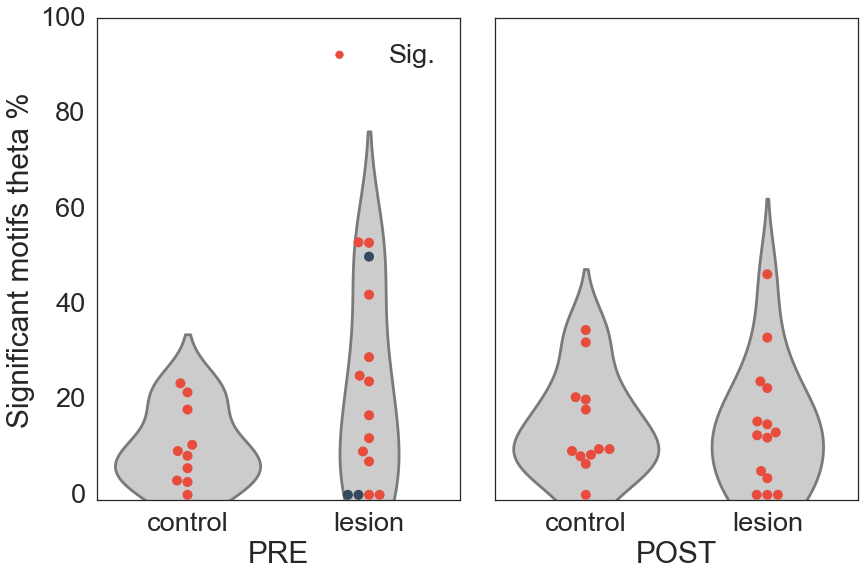

In [11]:
f,(ax,cx) = pl.subplots(1,2,sharey=True);
###############################################
sns.violinplot(x='group',y='prctTheta',data=PREpr,inner=None, color=".8",ax=ax)
sns.swarmplot(x='group',y='prctTheta',hue='sigT',size = 10,data=PREpr,ax=ax,palette=flatui)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:2],['Sig.'])
ax.set_xlabel('PRE')
ax.set_ylabel('Significant motifs theta %')
ax.set_ylim(-1,100)
############################################
sns.violinplot(x='group',y='prctTheta',data=POSTpr,inner=None, color=".8",cx=ax)
sns.swarmplot(x='group',y='prctTheta',hue='sigT',size = 10,data=POSTpr,ax=cx,palette=flatui)
cx.legend([],[])
cx.set_ylabel('')
cx.set_xlabel('POST')
f.tight_layout()

In [12]:
df = pd.DataFrame()
df['pre'] = PREdf.prct
df['pre_sig'] = PREdf.sig
df['run'] = RUNdf.prcnt_RO
df['run_sig'] = RUNdf.pv_RO
df['post']= POSTdf.prct
df['post_sig'] = POSTdf.sig